In [1]:
import tensorflow as tf
from keras.layers import (
    Input,
    Lambda,
    Dense,
    Flatten,
    GlobalAveragePooling2D,
    BatchNormalization,
    Dropout,
    Activation,
)
from keras.models import Model

# from keras.applications.densenet201 import DenseNet121
# from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50

# from keras.applications.densenet201 import DenseNet201
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
# # Loading Dataset
# import os
# import sys

# # Create new Train and val folders

# base_dir = "../dataset/RiceLeafs"
# train_path = "../dataset/RiceLeafs/train"
# val_path = "../dataset/RiceLeafs/validation/"

# column_names = os.listdir(train_path)
# for i in column_names:
#     os.makedirs(f"../dataset/RiceLeafs_Resized/train/{i}")
#     os.makedirs(f"../dataset/RiceLeafs_Resized/validation/{i}")

# # out_path = '../kaggle/output/train/'


FileNotFoundError: [WinError 3] The system cannot find the path specified: '../dataset/RiceLeafs/train'

In [ ]:
# # Resizing Image [OPTIONAL]
# from PIL import Image


# def resize(input_path, folder, column_name):
#     dirs = os.listdir(input_path)
#     for item in dirs:
#         item_path = input_path + "/" + item
#         if os.path.isfile(item_path):
#             # print('CHECK')
#             im = Image.open(item_path)

#             # Check whether the specified
#             # path exists or not
#             outpath = f"../dataset/RiceLeafs_Resized/{folder}/{column_name}"
#             temp_out_path = outpath + "/" + item
#             f, e = os.path.splitext(temp_out_path)

#             imResize = im.resize((255, 255), Image.Resampling.LANCZOS)
#             # print('CHECK 3')
#             imResize.save(f + ".jpg", "JPEG", quality=100)


In [ ]:
# # train Resizing
# input_path = "../dataset/RiceLeafs/train/Healthy"
# folder = "train"
# column_name = "Healthy"
# resize(input_path, folder, column_name)

# input_path = "../dataset/RiceLeafs/train/BrownSpot"
# folder = "train"
# column_name = "BrownSpot"
# resize(input_path, folder, column_name)

# input_path = "../dataset/RiceLeafs/train/Hispa"
# folder = "train"
# column_name = "Hispa"
# resize(input_path, folder, column_name)

# input_path = "../dataset/RiceLeafs/train/LeafBlast"
# folder = "train"
# column_name = "LeafBlast"
# resize(input_path, folder, column_name)

# print("Done with train resizing")


FileNotFoundError: [WinError 3] The system cannot find the path specified: '../dataset/RiceLeafs/train/Healthy'

In [ ]:
# # validation Resizing
# input_path = "../dataset/RiceLeafs/validation/Healthy"
# folder = "validation"
# column_name = "Healthy"
# resize(input_path, folder, column_name)

# input_path = "../dataset/RiceLeafs/validation/BrownSpot"
# folder = "validation"
# column_name = "BrownSpot"
# resize(input_path, folder, column_name)

# input_path = "../dataset/RiceLeafs/validation/Hispa"
# folder = "validation"
# column_name = "Hispa"
# resize(input_path, folder, column_name)

# input_path = "../dataset/RiceLeafs/validation/LeafBlast"
# folder = "validation"
# column_name = "LeafBlast"
# resize(input_path, folder, column_name)

# print("Done with validation resizing")


In [ ]:
# new resized path of training and testing
train_dir = "../dataset/RiceLeafs_Resized_1000/train"
test_dir = "../dataset/RiceLeafs_Resized_1000/validation"


In [ ]:
# counting the number of images of train and validation
import time
import os
from os.path import exists


def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + " files"


print("total images for training :", count(train_dir))
print("total images for validation :", count(test_dir))


total images for training : ../dataset/RiceLeafs_Resized_1000/train : 744 files
total images for validation : ../dataset/RiceLeafs_Resized_1000/validation : 246 files


In [ ]:
# Determinin the no of class and name
classes = []
for file in os.listdir(train_dir):
    classes += [file]
print(classes)
print(len(classes))


['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']
4


In [ ]:
# eta ki jani na
N = []
for i in range(len(classes)):
    N += [i]

mapping = dict(zip(classes, N))
reverse_mapping = dict(zip(N, classes))


def mapper(value):
    return reverse_mapping[value]


In [ ]:
# Visualizing the Images of training dataset
brownspot = [
    train_dir + "/BrownSpot/" + img for img in os.listdir(train_dir + "/BrownSpot")[:9]
]
healthy = [
    train_dir + "/Healthy/" + img for img in os.listdir(train_dir + "/Healthy")[:9]
]
hispa = [train_dir + "/Hispa/" + img for img in os.listdir(train_dir + "/Hispa")[:9]]
leafblast = [
    train_dir + "/LeafBlast/" + img for img in os.listdir(train_dir + "/LeafBlast")[:9]
]

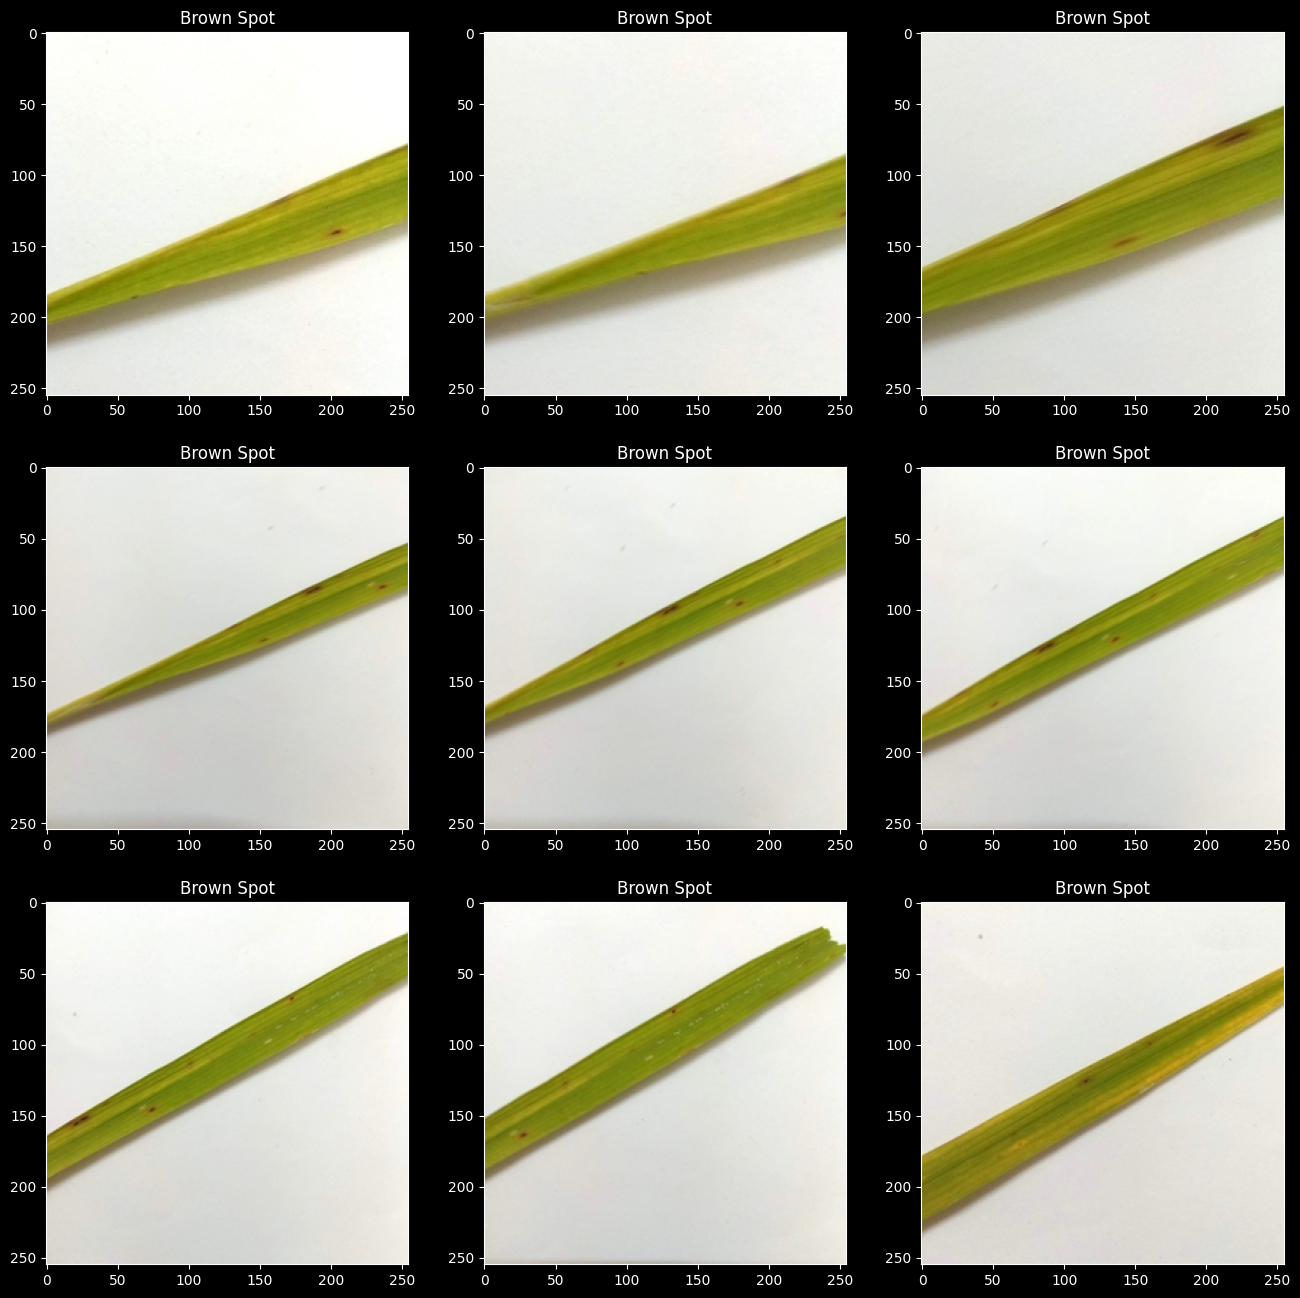

In [ ]:
# Brown Spot
from PIL import Image

plt.figure(figsize=(16, 16))
for i, k in enumerate(brownspot):
    image = Image.open(k)
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title("Brown Spot")

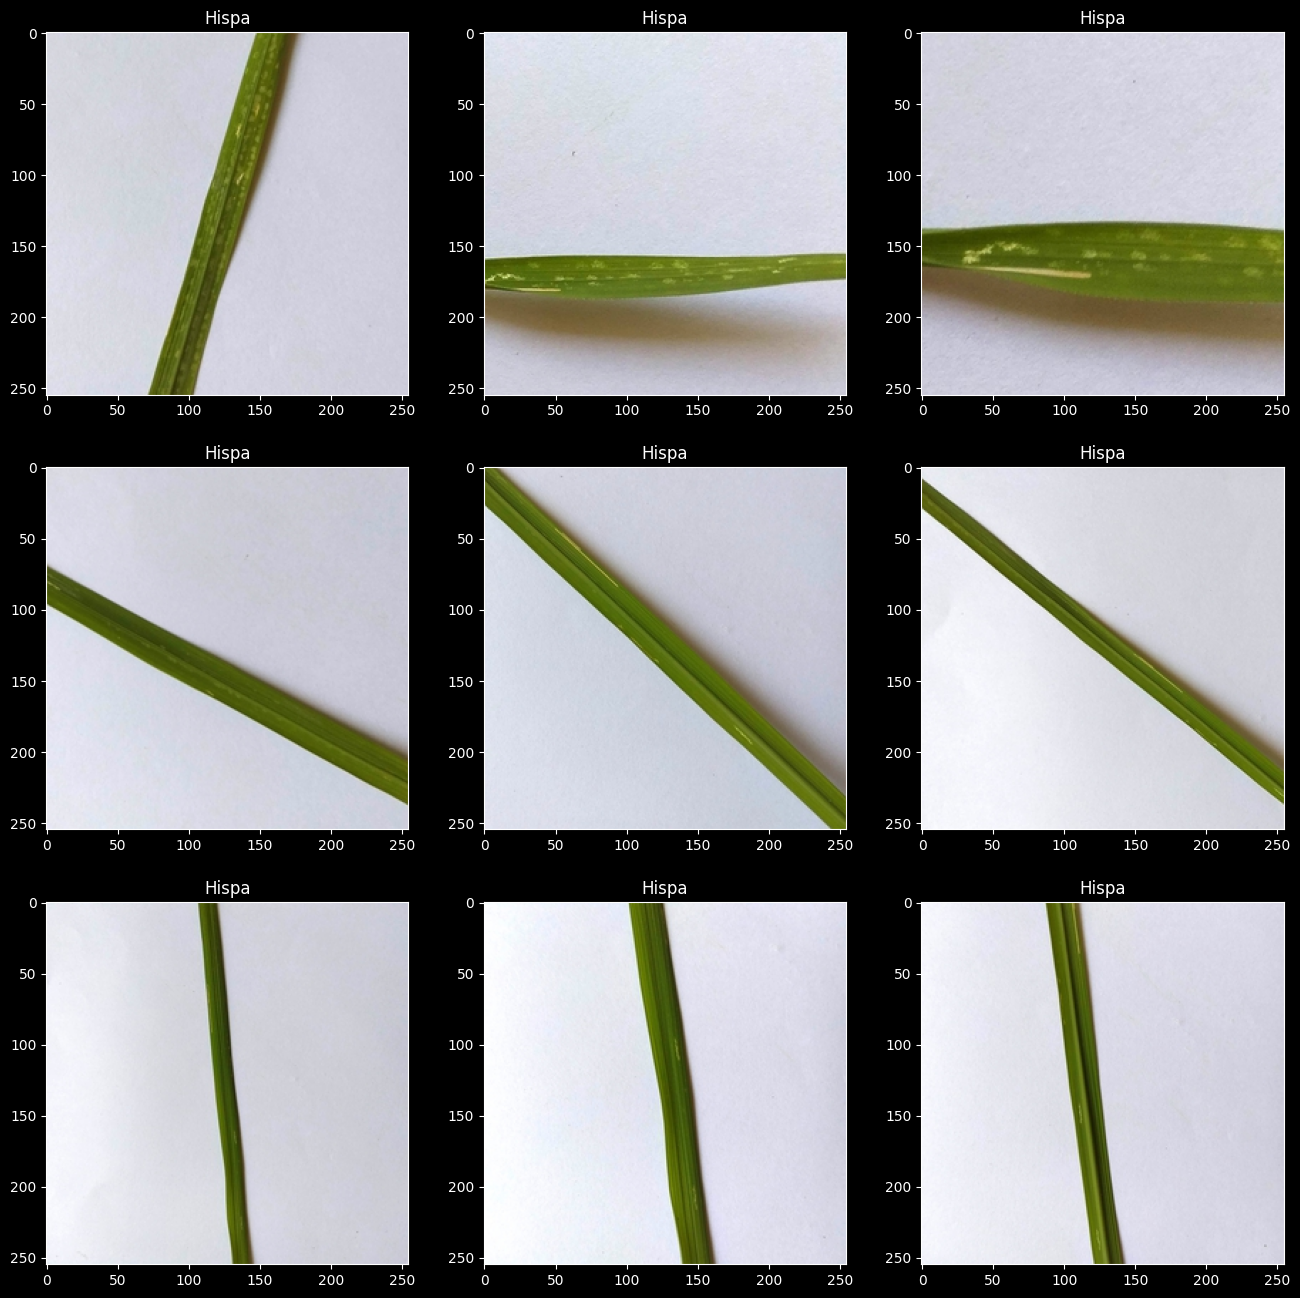

In [ ]:
# Hispa
plt.figure(figsize=(16, 16))
for i, k in enumerate(hispa):
    image = Image.open(k)
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title("Hispa")


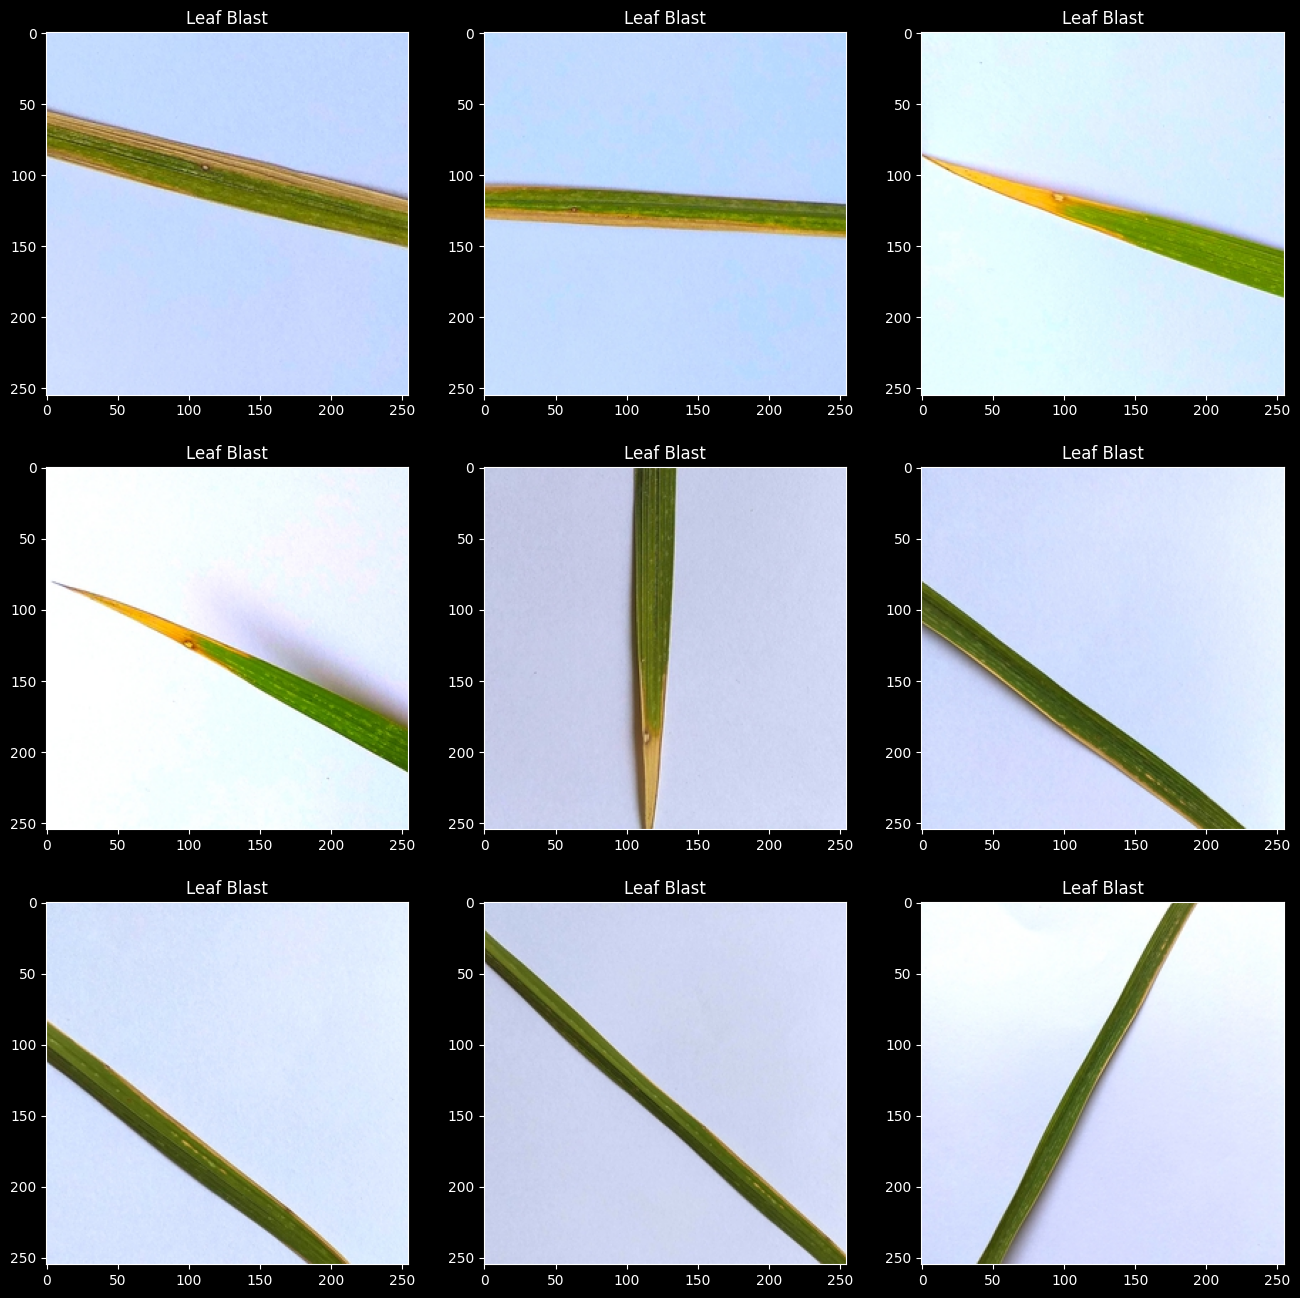

In [ ]:
# Leaf Blast
plt.figure(figsize=(16, 16))
for i, k in enumerate(leafblast):
    image = Image.open(k)
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title("Leaf Blast")


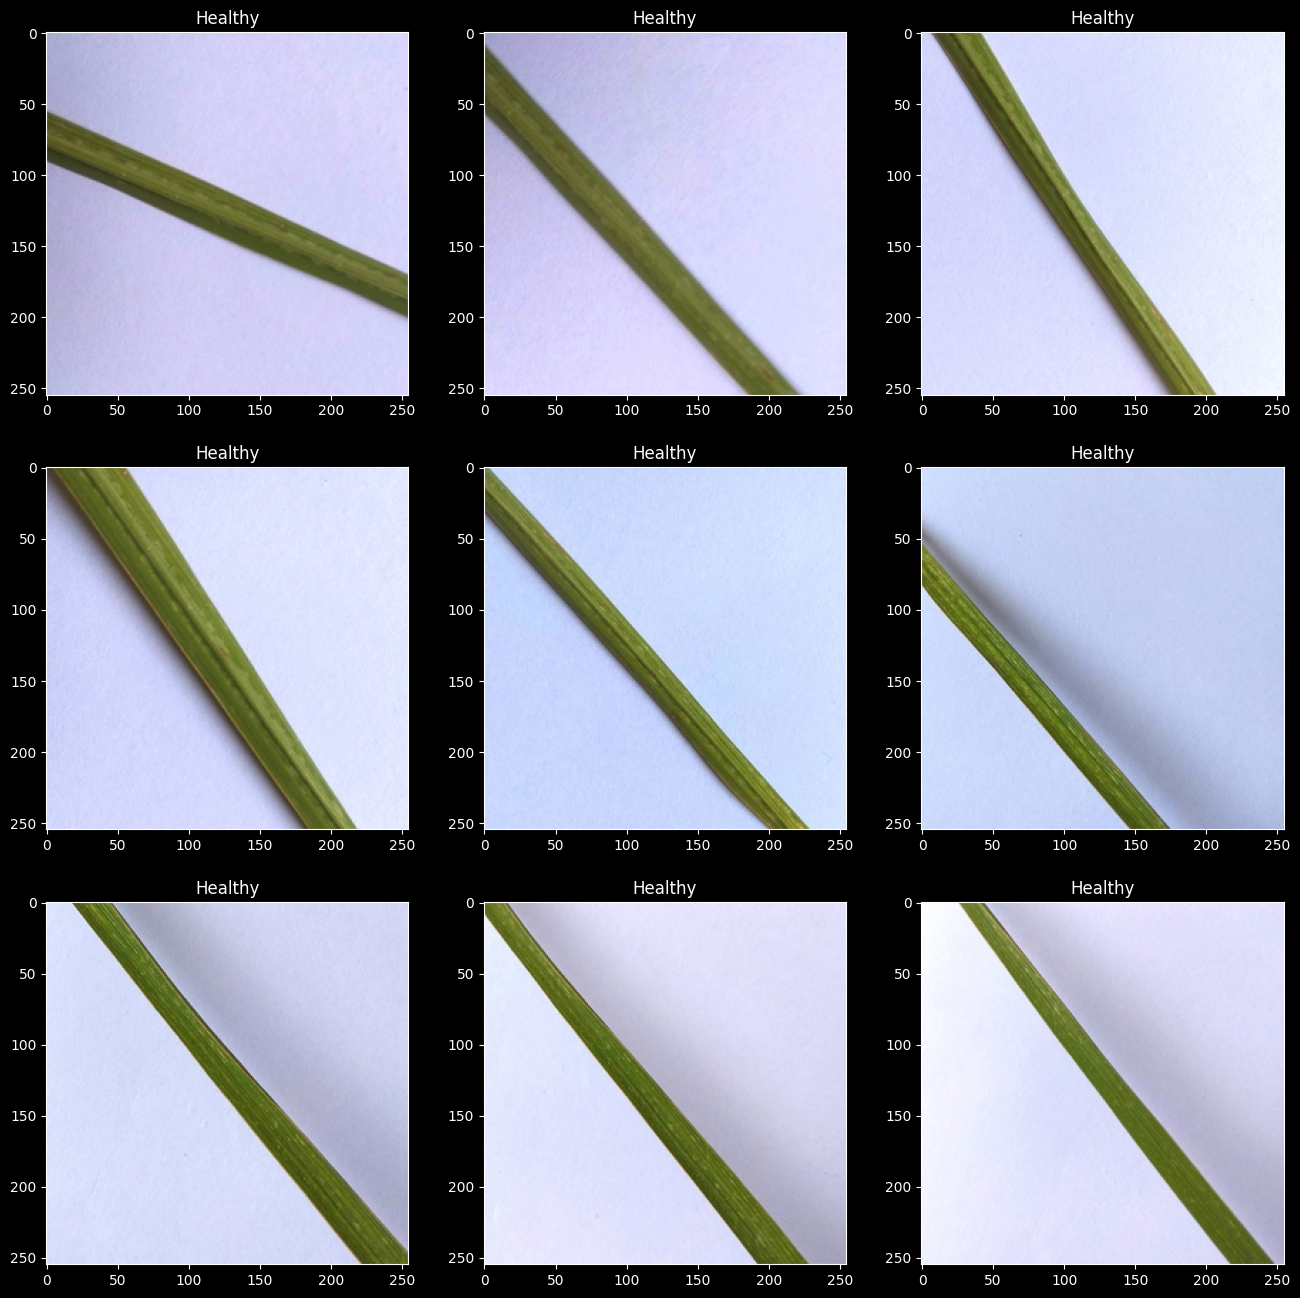

In [ ]:
# Healthy
plt.figure(figsize=(16, 16))
for i, k in enumerate(healthy):
    image = Image.open(k)
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title("Healthy")


## ekhan theke code ta 2 ta process maintain korbe


### PROCESS-1 (DenseNet201)


In [ ]:
# Reading The Image
# For Train dataset
from PIL import Image

dataset = []
shape = (224, 224)
count = 0
# FOR EACH OF THE IMAGE
# 1. WE READ THE IMAGE IN RGB FORMAT
# 2. CONVERT IT INTO AN ARRAY
# 3. SCALE DOWN THE PIXELS
# 4. STORE THE PIXEL INFORMATION
for file in os.listdir(train_dir):
    path = os.path.join(train_dir, file)
    t = 0
    for im in os.listdir(path):
        image = load_img(
            os.path.join(path, im), grayscale=False, color_mode="rgb", target_size=shape
        )
        image = img_to_array(image)
        image = image / 255.0
        dataset += [[image, count]]
        t += 1
    count = count + 1

In [ ]:
# For Test dataset
testset = []
count = 0
for file in os.listdir(test_dir):
    path = os.path.join(test_dir, file)
    t = 0
    for im in os.listdir(path):
        image = load_img(
            os.path.join(path, im), grayscale=False, color_mode="rgb", target_size=shape
        )
        image = img_to_array(image)
        image = image / 255.0
        testset += [[image, count]]
        t += 1
    count = count + 1

In [ ]:
# Preparing the Data For Out Model

# WE CREATE THE LABELS AND THE FEATURES FROM THE DATASET FOR BOTH TRAIN AND TEST
data, labels0 = zip(*dataset)
test, testlabels0 = zip(*testset)

labels1 = to_categorical(labels0)
labels = np.array(labels1)

data = np.array(data)
test = np.array(test)


In [ ]:
# SPLIT THE DATASET INTO 80-20,TRAIN-VALIDATION RATIO
trainx, testx, trainy, testy = train_test_split(
    data, labels, test_size=0.2, random_state=42
)
print("TrainingX Shape: {0}".format(trainx.shape))
print("TestingX Shape: {0}".format(testx.shape))
print("TrainingY Shape: {0}".format(trainy.shape))
print("TestingY Shape: {0}".format(testy.shape))

TrainingX Shape: (595, 224, 224, 3)
TestingX Shape: (149, 224, 224, 3)
TrainingY Shape: (595, 4)
TestingY Shape: (149, 4)


In [ ]:
# WE CREATE A BATCH OF IMAGES AFTER AUGMENTING THEM
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.2,
    shear_range=0.2,
)

## CHOOSING AND BUILDING A MODEL


## 1. Simple Convolutional Neural Network


In [ ]:
# #Creating the dense layer
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (224,224,3)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
#     tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
#     tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
# #    tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(256,(3,3),activation = 'relu'),
# #    tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(512,(3,3),activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(512,(3,3),activation = 'relu'),
#     tf.keras.layers.Conv2D(1024,(3,3),activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1024,activation = 'relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(512,activation = 'relu'),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Dense(256,activation = 'relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(4,activation = 'softmax')

# ],    name = 'Conv2D_Model')

# model.summary()


In [ ]:
# #Optimizing the model
# LEARNING_RATE = 0.001 #@param {type:"number"}

# model.compile(optimizer = tf.keras.optimizers.Adam(),
#               loss = 'categorical_crossentropy',
#               metrics = ['categorical_accuracy'])


In [ ]:
# #Save the model epoch
# #tutorial: https://www.youtube.com/watch?v=HxtBIwfy0kM
# checkpoint_path = 'training_1/cp.ckpt'
# checkpoint_dir = os.path.dirname(checkpoint_path)
# cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)
# #!ls {checkpoint_dir}


In [ ]:
# #@param {type:"integer"}

# #his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=10)
# his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=2,callbacks=[cp_callback])


In [ ]:
# #Viewing the model
# get_acc = his.history['categorical_accuracy']
# value_acc = his.history['val_categorical_accuracy']
# get_loss = his.history['loss']
# validation_loss = his.history['val_loss']

# epochs = range(len(get_acc))
# plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
# plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
# plt.title('Training vs validation accuracy')
# plt.legend(loc=0)
# plt.figure()
# plt.show()


In [ ]:
pretrained_model3 = tf.keras.applications.InceptionV3(
    input_shape=(224, 224, 3), include_top=False, weights="imagenet"
)


In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Flatten()(pretrained_model3.output)
x3 = tf.keras.layers.Dense(1024, activation="relu")(x3)
x3 = tf.keras.layers.BatchNormalization()(x3)
x3 = tf.keras.layers.Dropout(0.2)(x3)
# # x3 = GlobalAveragePooling2D()(pretrained_model3.output)
# x3 = tf.keras.layers.Dense(512, activation='relu')(x3)
# # x3 = tf.keras.layers.BatchNormalization()(x3)
# x3 = tf.keras.layers.Dropout(0.1)(x3)
# x3 = tf.keras.layers.Dense(128, activation='relu')(x3)
# x3 = tf.keras.layers.Dropout(0.3)(x3)
# x3 = tf.keras.layers.Dense(64, activation='relu')(x3)
# # x3 = tf.keras.layers.Dropout(0.2)(x3)
# x3 = tf.keras.layers.Dense(32, activation='relu')(x3)
# x3 = tf.keras.layers.Dropout(0.2)(x3)
# x3 = tf.keras.layers.Dense(16, activation='relu')(x3)
outputs3 = tf.keras.layers.Dense(4, activation="softmax")(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)


In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

In [ ]:
his = model.fit(
    datagen.flow(trainx, trainy, batch_size=32),
    validation_data=(testx, testy),
    epochs=40,
)

Epoch 1/40
19/19 [==============================] - 440s 21s/step - loss: 2.2089 - accuracy: 0.4168 - val_loss: 3.1160 - val_accuracy: 0.3758
Epoch 2/40
19/19 [==============================] - 391s 20s/step - loss: 1.7441 - accuracy: 0.5227 - val_loss: 6.9476 - val_accuracy: 0.3356
Epoch 3/40
19/19 [==============================] - 374s 20s/step - loss: 1.3380 - accuracy: 0.5866 - val_loss: 6.8872 - val_accuracy: 0.3020
Epoch 4/40
19/19 [==============================] - 434s 23s/step - loss: 1.0832 - accuracy: 0.5580 - val_loss: 6.5996 - val_accuracy: 0.4497
Epoch 5/40
19/19 [==============================] - 388s 20s/step - loss: 0.9365 - accuracy: 0.6538 - val_loss: 3.1403 - val_accuracy: 0.5168
Epoch 6/40
19/19 [==============================] - 383s 20s/step - loss: 0.8846 - accuracy: 0.6689 - val_loss: 2.9319 - val_accuracy: 0.5302
Epoch 7/40
19/19 [==============================] - 424s 22s/step - loss: 0.7917 - accuracy: 0.6773 - val_loss: 5.8820 - val_accuracy: 0.5034
Epoch 

In [ ]:
y_pred = model.predict(testx)
pred = np.argmax(y_pred, axis=1)
ground = np.argmax(testy, axis=1)
print(classification_report(ground, pred))
model.save("ResNetForPlant.h5")


5/5 [==============================] - 15s 2s/step
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        39
           1       0.72      0.68      0.70        41
           2       0.74      0.82      0.78        39
           3       0.77      0.77      0.77        30

    accuracy                           0.79       149
   macro avg       0.79      0.79      0.79       149
weighted avg       0.79      0.79      0.79       149



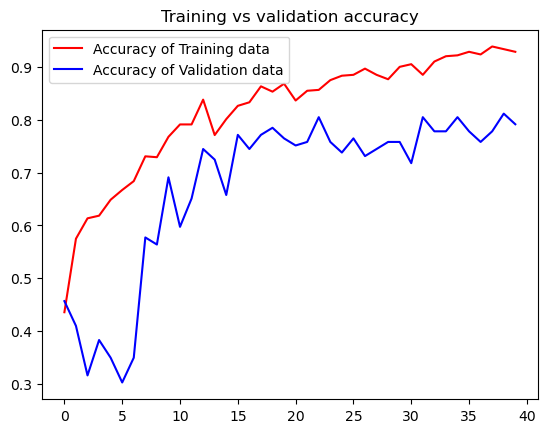

<Figure size 640x480 with 0 Axes>

In [ ]:
get_acc = his.history["accuracy"]
value_acc = his.history["val_accuracy"]
get_loss = his.history["loss"]
validation_loss = his.history["val_loss"]

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, "r", label="Accuracy of Training data")
plt.plot(epochs, value_acc, "b", label="Accuracy of Validation data")
plt.title("Training vs validation accuracy")
plt.legend(loc=0)
plt.figure()
plt.show()


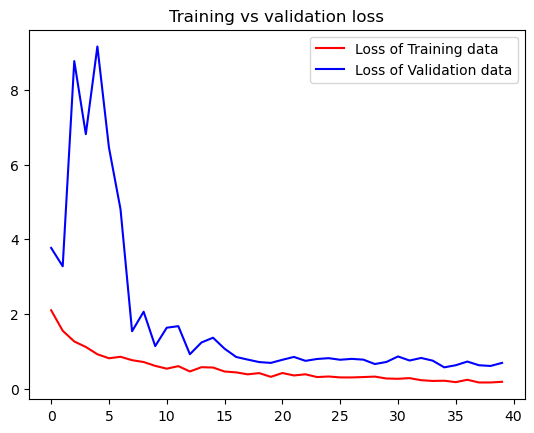

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, "r", label="Loss of Training data")
plt.plot(epochs, validation_loss, "b", label="Loss of Validation data")
plt.title("Training vs validation loss")
plt.legend(loc=0)
plt.figure()
plt.show()


In [ ]:
model.save("ResNetForPlant.h5")


In [ ]:
class estimator:
    _estimator_type = ""
    classes_ = []

    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = "classifier"
        self.classes_ = classes

    def predict(self, X):
        y_prob = self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred


classifier = estimator(model, classes)


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier,testx,ground)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(trainy)
y_onehot_test = label_binarizer.transform(testy)
y_onehot_test.shape  # (n_samples, n_classes)


(149, 4)

In [ ]:
label_binarizer.transform([1])


array([[0, 1, 0, 0]])

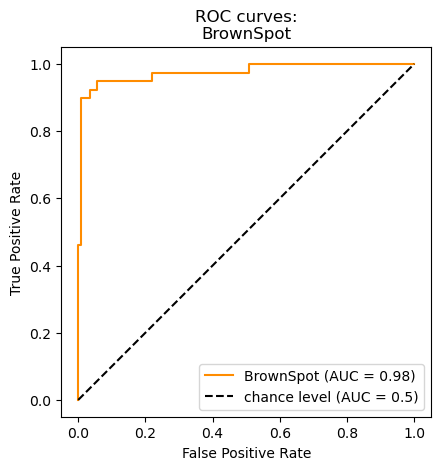

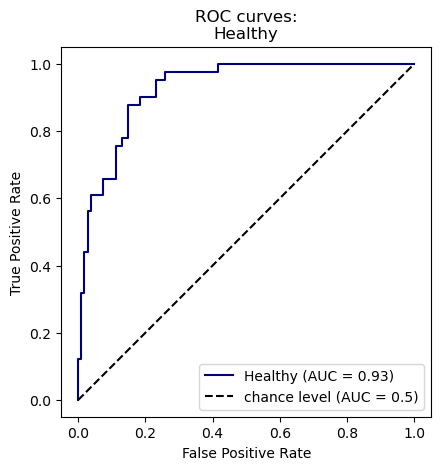

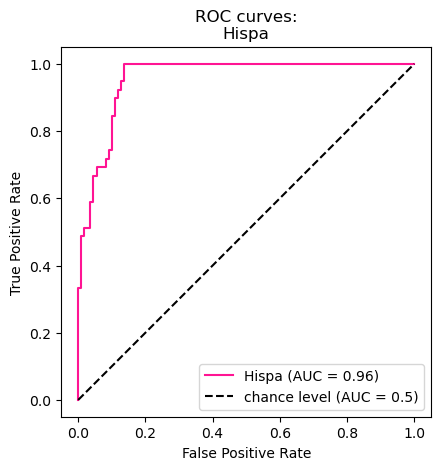

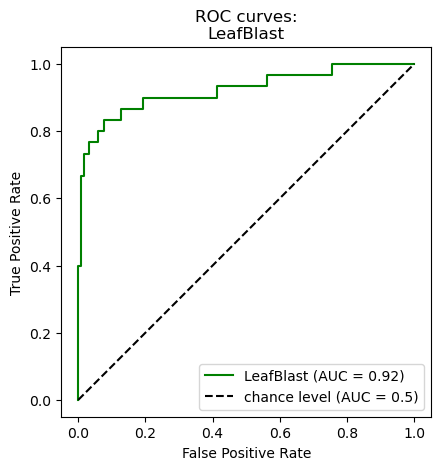

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

colors = ["darkorange", "navy", "deeppink", "green"]

for i in range(len(classes)):
    class_of_interest = i
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred[:, class_id],
        # name=f"{class_of_interest} vs the rest",
        name=f"{classes[i]}",
        # color="darkorange",
        color=colors[i],
    )
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # plt.title("One-vs-Rest ROC curves:\nBrownSpot vs (Setosa & Versicolor)")
    plt.title("ROC curves:\n{}".format(classes[i]))
    plt.legend()
plt.show()


NameError: name 'target_names' is not defined

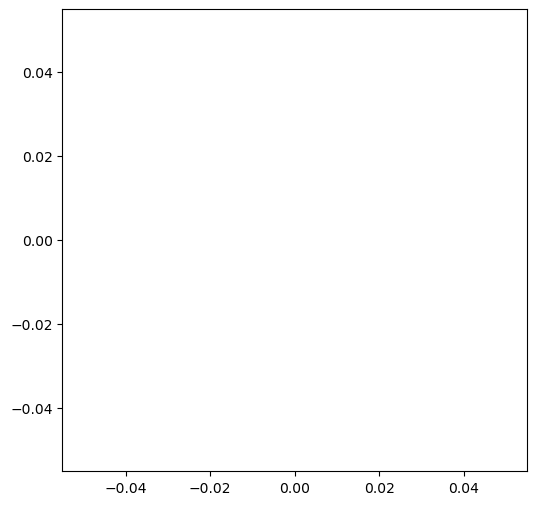

In [ ]:
# ['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    # label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    # label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(len(classes), colors)):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()


In [ ]:
# example of brighting image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
img = load_img("../dataset/RiceLeafs_Resized_1000/train/Hipsa/IMG_20190420_194642.jpg")
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.1, 1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype("uint8")
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

ImportError: cannot import name 'load_img' from 'keras.preprocessing.image' (C:\ProgramData\Anaconda3\lib\site-packages\keras\preprocessing\image.py)